IMPORTS Y DEFINICIONES GLOBALES

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from jcm_lib import fases,concurrence
import matplotlib as mpl

e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(2,0)) #1
e1=tensor(e,basis(2,1)) #2
g0=tensor(gr,basis(2,0)) #3
g1=tensor(gr,basis(2,1)) #4

sz=tensor(sigmaz(),qeye(2))
sx=tensor(sigmax(),qeye(2))
sy=tensor(sigmay(),qeye(2))
sp=tensor(sigmap(),qeye(2))
sm=tensor(sigmam(),qeye(2))
a=tensor(qeye(2),destroy(2))

w_0=1
g=0.001*w_0

In [4]:
def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

ESFERA DE BLOCH

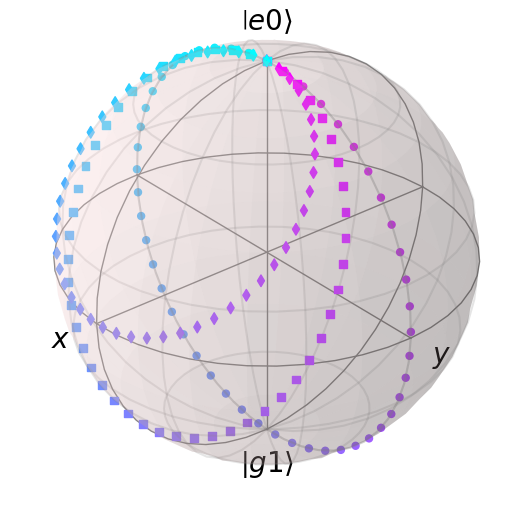

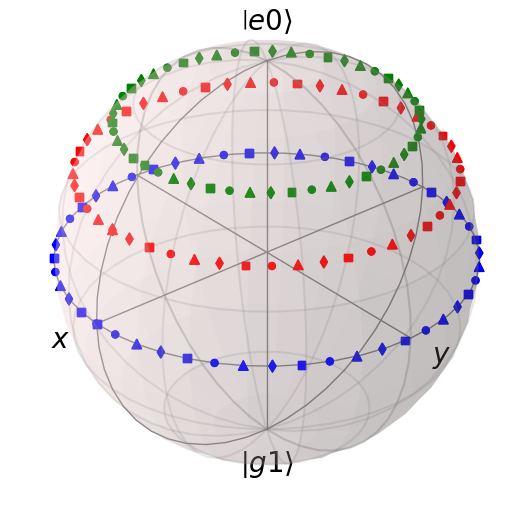

In [10]:
'''---Esfera de bloch para enfoque cinematico---'''

esfera=Bloch()
esfera.make_sphere()
esfera.clear()



color=['blue','red','green','black']
for ind,delta in enumerate([0,g,2*g]):
    t=np.linspace(0,2*np.pi/omega_n(1,delta))
    nrm = mpl.colors.Normalize(0, t[-1])
    colors = mpl.cm.cool(nrm(t))
    c_b=-1j*np.sqrt(omega_n(1,delta)**2-delta**2)/omega_n(1,delta)*np.sin(omega_n(1,delta)*t/2)
    c_a=(omega_n(1,delta)-delta)/(2*omega_n(1,delta))*np.exp(1j*omega_n(1,delta)*t/2)+(omega_n(1,delta)+delta)/(2*omega_n(1,delta))*np.exp(-1j*omega_n(1,delta)*t/2)
    ux=np.real(c_b/c_a)
    uy=np.imag(c_b/c_a)
    px=(2*ux)/(1+ux**2+uy**2)
    py=(2*uy)/(1+ux**2+uy**2)
    pz=(1-ux**2-uy**2)/(1+ux**2+uy**2)
    points=[px,py,pz]

    esfera.add_points(points,'m',colors=colors)


# esfera.view([-40,30])

esfera.render()
esfera.show()
# esfera.save('bloch cinematica.png')

'''---Fase de Berry---'''
esfera=Bloch()
esfera.make_sphere()
esfera.clear()

esfera.clear()

for inde,delta in enumerate([0,g,2*g]):
    for omega in np.linspace(0,2*np.pi):
        psi_plus=cos_theta_n(1,delta)*e+np.exp(-1j*omega)*sin_theta_n(1,delta)*gr
        # psi_minus=-sin_theta_n(1,delta)*e0+np.exp(-1j*omega)*cos_theta_n(1,delta)*g1
        vec = [expect(sigmax(), psi_plus),
                expect(sigmay(), psi_plus),
                expect(sigmaz(), psi_plus)]

        esfera.add_points(vec,colors=color[inde])

esfera.render()
# esfera.save('bloch berry.png')
esfera.show()

DISIPATIVO Y REPRODUCCION DE GRAFICOS LUDMI

<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_2728\267616854.py:81: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_2728\267616854.py:83: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)


55536.03672697958


c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


55536.03672697958


Text(0.5, 0, '$t/T$')

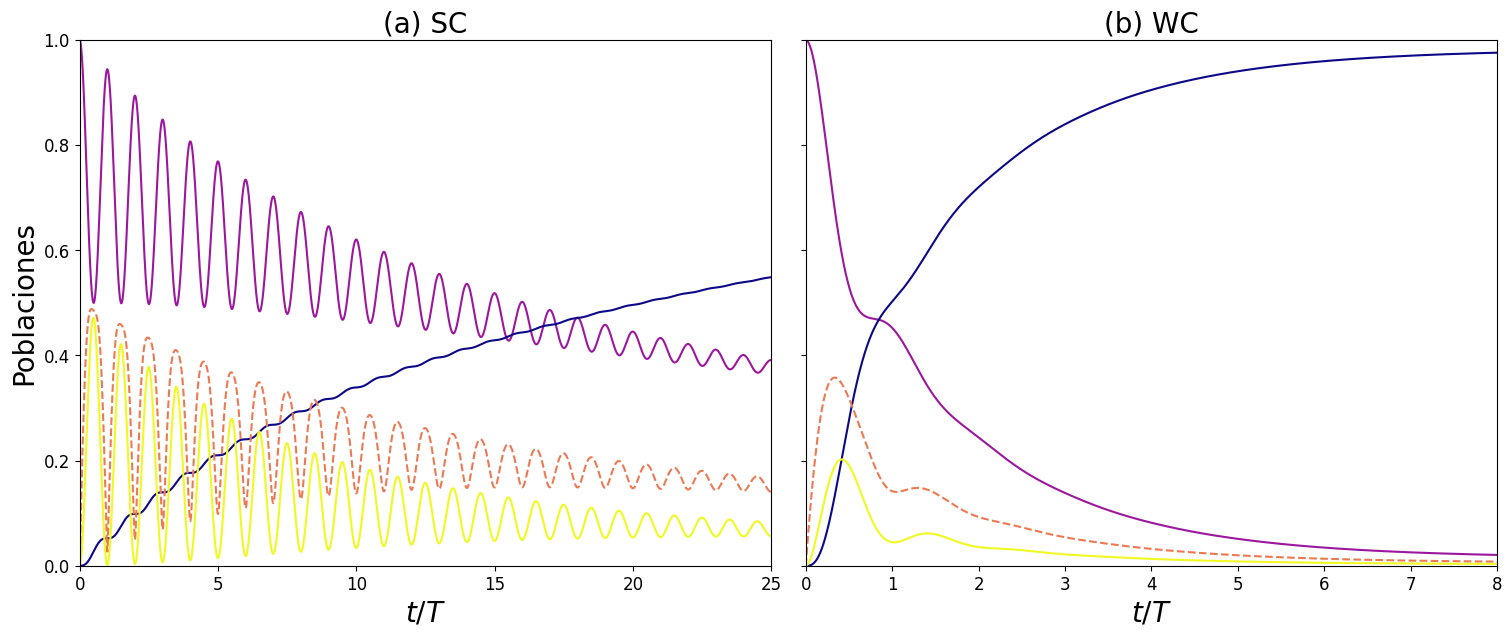

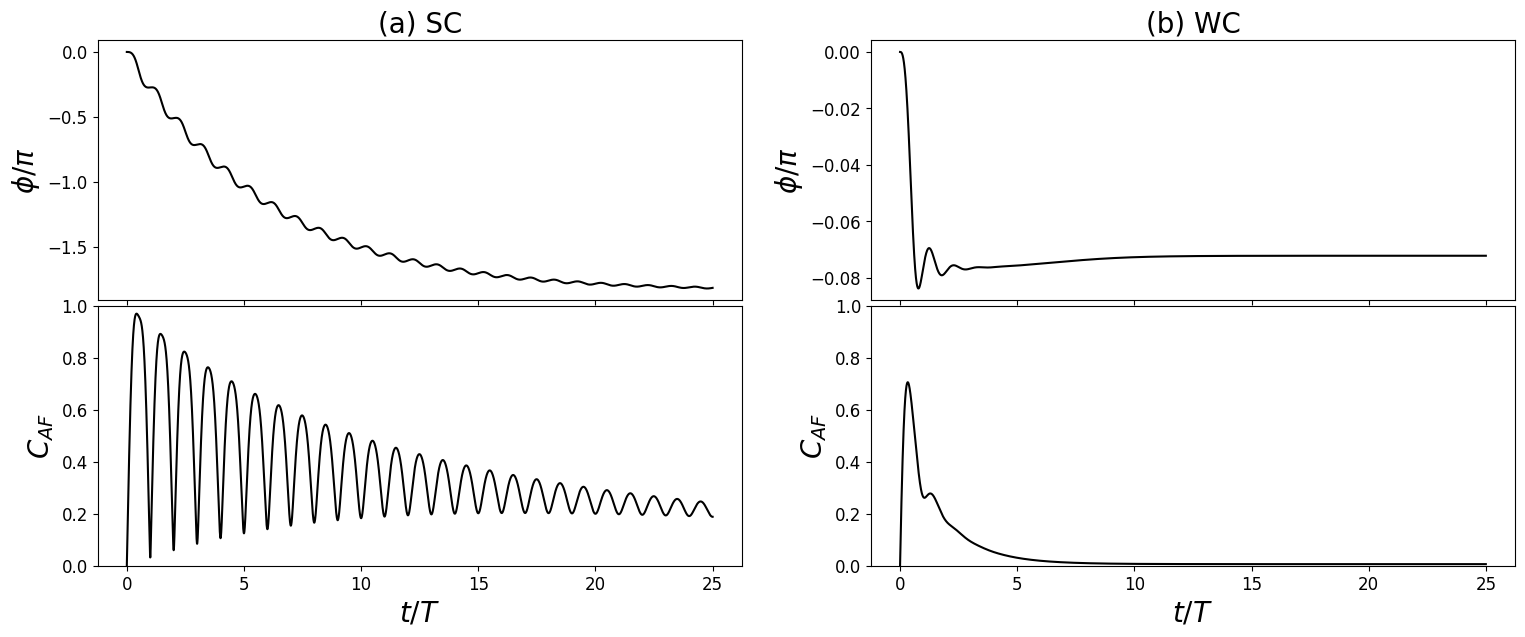

In [11]:
gamma=0.1*g
p=0.005*g
delta=2*g

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=colormaps['plasma'](np.linspace(0,1,4))
for j,gamma in enumerate([0.1*g,2*g]):
    H=delta/2*sz + g*(a.dag()*sm+a*sp)

    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta)
    t_final=25*T
    print(t_final)
    steps=20000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    concu=concurrence(sol_d.states)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[sol_d.states[i][0][0] for i in range(len(sol_d.states))],color=colors[1],label='e0')
    ax[j].plot(t/T,[sol_d.states[i][2][2] for i in range(len(sol_d.states))],color=colors[0],label='g0')
    ax[j].plot(t/T,[sol_d.states[i][3][3] for i in range(len(sol_d.states))],color=colors[3],label='g1')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][0][3]) for i in range(len(sol_d.states))],color=colors[2],linestyle='dashed',label='$C_{e0,g1}')
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AF}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AF}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()

KERR

UNITARIO BLOCH, AUTOESTADOS Y AUTOENERGIAS

POBLACIONES

<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_2728\2275243944.py:83: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_2728\2275243944.py:85: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)


55536.03672697958


c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


55536.03672697958


Text(0.5, 0, '$t/T$')

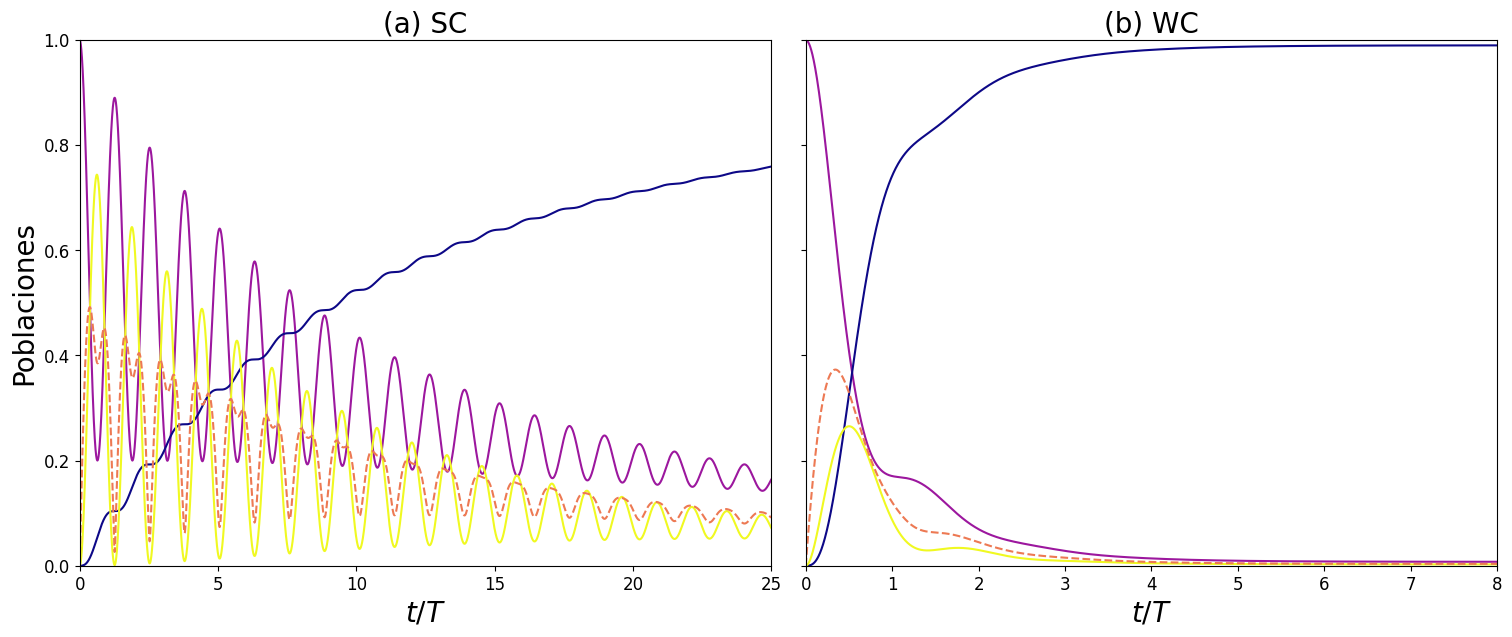

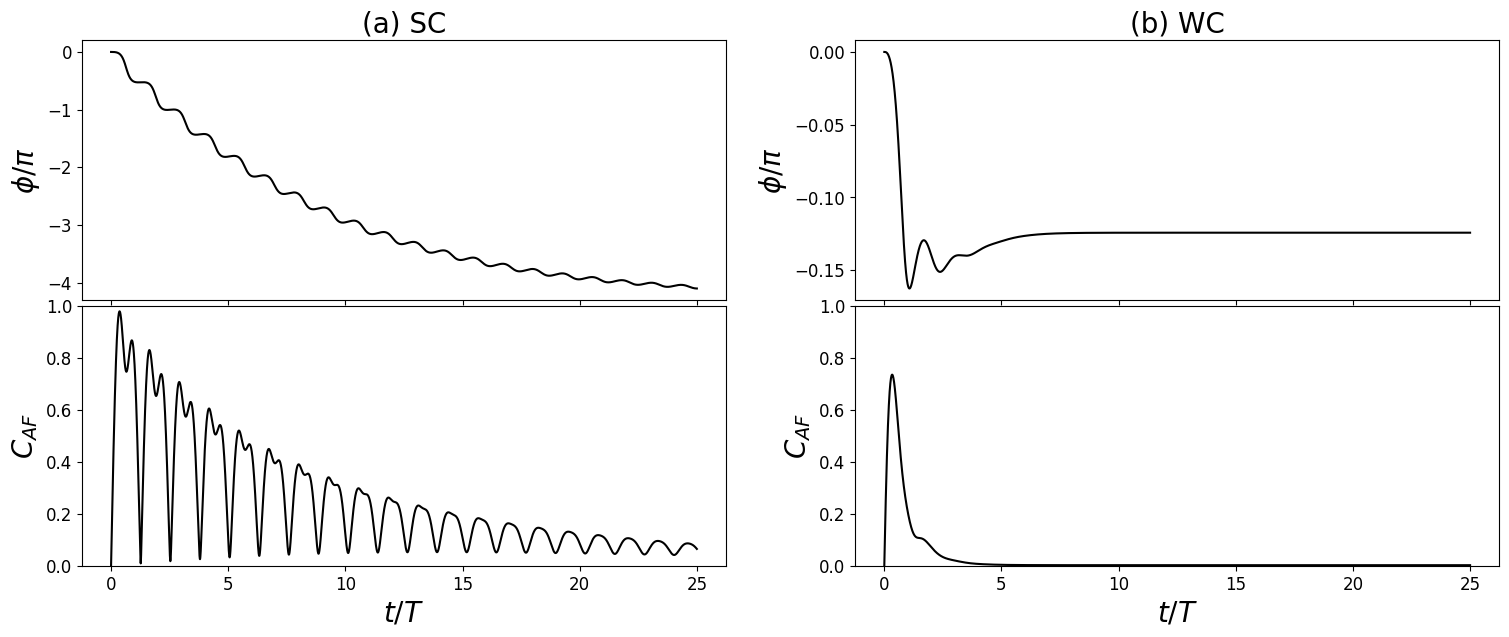

In [10]:
gamma=0.1*g
p=0.005*g
delta=2*g
x=g

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=colormaps['plasma'](np.linspace(0,1,4))

for j,gamma in enumerate([0.1*g,2*g]):
    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)

    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta)
    t_final=25*T
    print(t_final)
    steps=20000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    concu=concurrence(sol_d.states)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[sol_d.states[i][0][0] for i in range(len(sol_d.states))],color=colors[1],label='e0')
    ax[j].plot(t/T,[sol_d.states[i][2][2] for i in range(len(sol_d.states))],color=colors[0],label='g0')
    ax[j].plot(t/T,[sol_d.states[i][3][3] for i in range(len(sol_d.states))],color=colors[3],label='g1')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][0][3]) for i in range(len(sol_d.states))],color=colors[2],linestyle='dashed',label='$C_{e0,g1}')
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AF}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AF}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()

FG DEPENDENCIA CON EL ACOPLAMIENTO

<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:65: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\4074137778.py:65: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

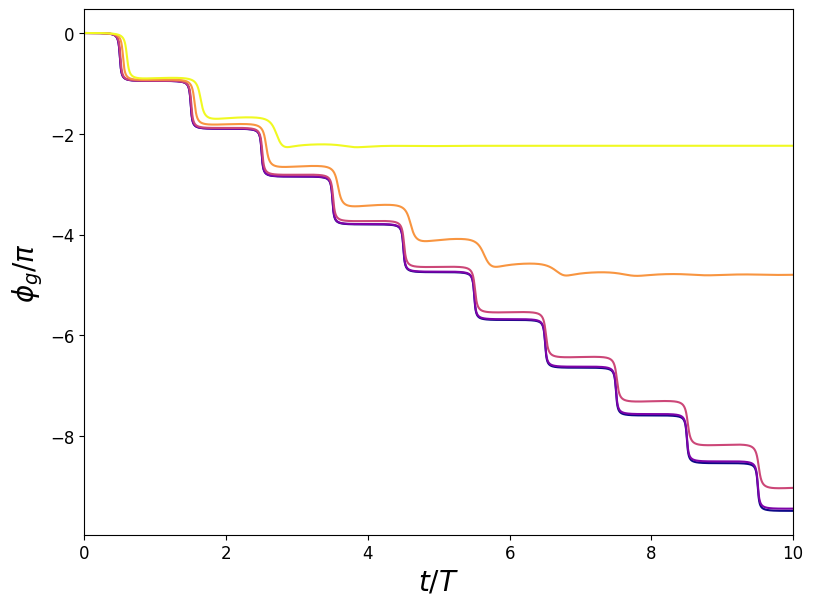

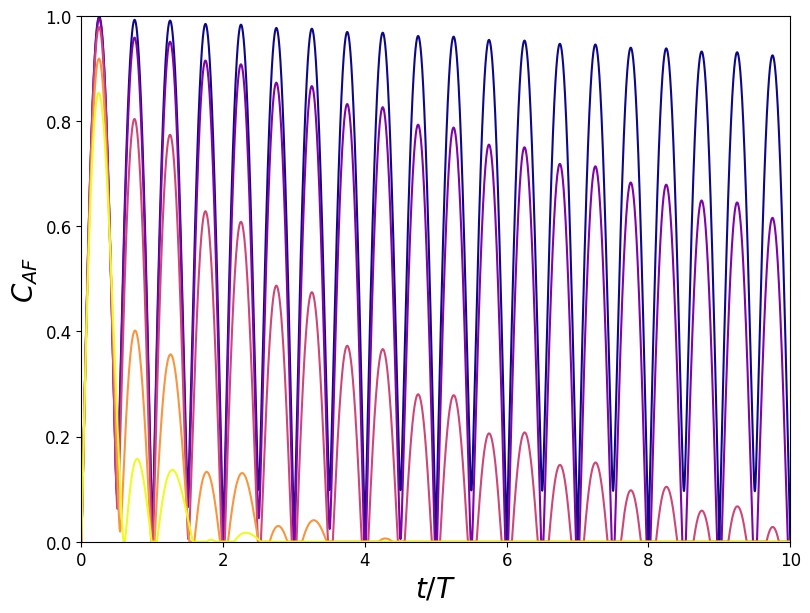

In [18]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from jcm_lib import fases,concurrence
from matplotlib import colormaps

e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(2,0)) #1
e1=tensor(e,basis(2,1)) #2
g0=tensor(gr,basis(2,0)) #3
g1=tensor(gr,basis(2,1)) #4

sz=tensor(sigmaz(),qeye(2))
sx=tensor(sigmax(),qeye(2))
sy=tensor(sigmay(),qeye(2))
sp=tensor(sigmap(),qeye(2))
sm=tensor(sigmam(),qeye(2))
a=tensor(qeye(2),destroy(2))

w_0=1
g=0.001*w_0
delta=0.1*g
p=0.005*g
x=0

def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
colors=colormaps['plasma'](np.linspace(0,1,5))
for i,gamma in enumerate([0,0.01*g,0.1*g,0.5*g,g]):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta)
    t_final=10*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,10)
ax_concu.set_xlim(0,10)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


INTENTO DE HACER EL FORMAL

<>:66: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\753701074.py:66: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\753701074.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  fg[i]+=fg[i-1]+0.5*dt*(np.imag(dot_rho_12*np.conjugate(rho12))/((rho22-e)**2+np.conjugate(rho12)*rho12)+np.imag(dot_rho_12_a*np.conjugate(rho12_a))/((rho22_a-e_a)**2+np.conjugate(rho12_a)*rho12_a))


Text(0.5, 0, '$t/T$')

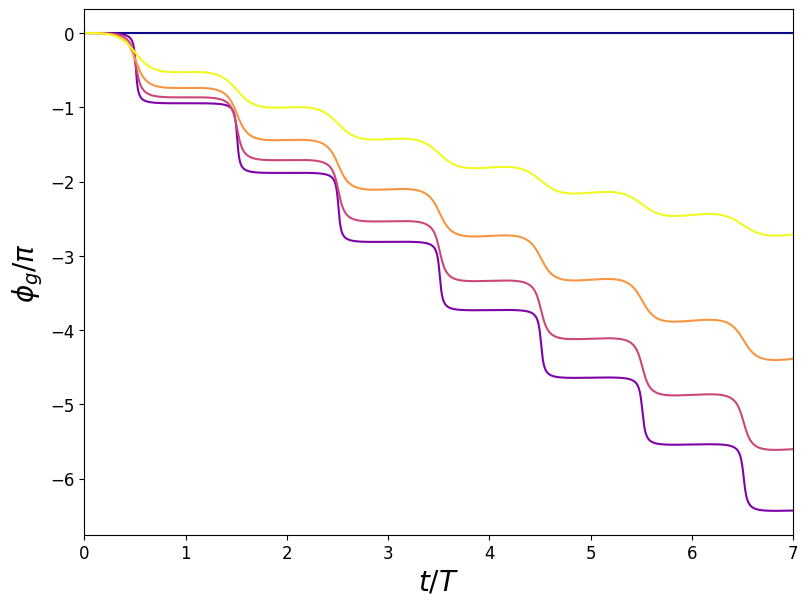

In [17]:
def fg_formal(sol_states:list,t_final:float,steps:float,g:float,delta:float,gamma:float):
    dt=t_final/steps
    fg=np.zeros(len(sol_states))
    rho22_a=0
    rho12_a=0
    rho11_a=1
    dot_rho_12_a=-1j*g*(rho22_a-rho11_a)-(1j*delta+0.5*gamma)*rho12_a
    e_a=0.5*(rho11_a+rho22_a+np.sqrt((rho11_a-rho22_a)**2+4*rho12_a*np.conjugate(rho12_a)))
    for i in range(1,len(sol_states)):
        rho22=sol_states[i][3][3]
        rho11=sol_states[i][0][0]
        rho12=sol_states[i][0][3]

        dot_rho_12=-1j*g*(rho22-rho11)-(1j*delta+0.5*gamma)*rho12
        e=0.5*(rho11+rho22+np.sqrt((rho11-rho22)**2+4*rho12*np.conjugate(rho12))) 

        fg[i]+=fg[i-1]+0.5*dt*(np.imag(dot_rho_12*np.conjugate(rho12))/((rho22-e)**2+np.conjugate(rho12)*rho12)+np.imag(dot_rho_12_a*np.conjugate(rho12_a))/((rho22_a-e_a)**2+np.conjugate(rho12_a)*rho12_a))

        rho22_a=rho22
        rho12_a=rho12
        rho11_a=rho11
        dot_rho_12_a=dot_rho_12
        e_a=e
    return fg

w_0=1
g=0.001*w_0
p=0.005*g
x=0
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta=[0,0.1*g,0.25*g,0.5*g,g]
colors=colormaps['plasma'](np.linspace(0,1,len(delta)))
for i,delta in enumerate(delta):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=7*T
    steps=100000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    

    fg = fg_formal(sol_d.states,t_final,steps,g,delta,gamma)

    ax_fg.plot(t/T,fg/np.pi,color=colors[i])


ax_fg.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


DEPENDENCIA CON EL DETUNNING 1

<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\1911204504.py:46: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

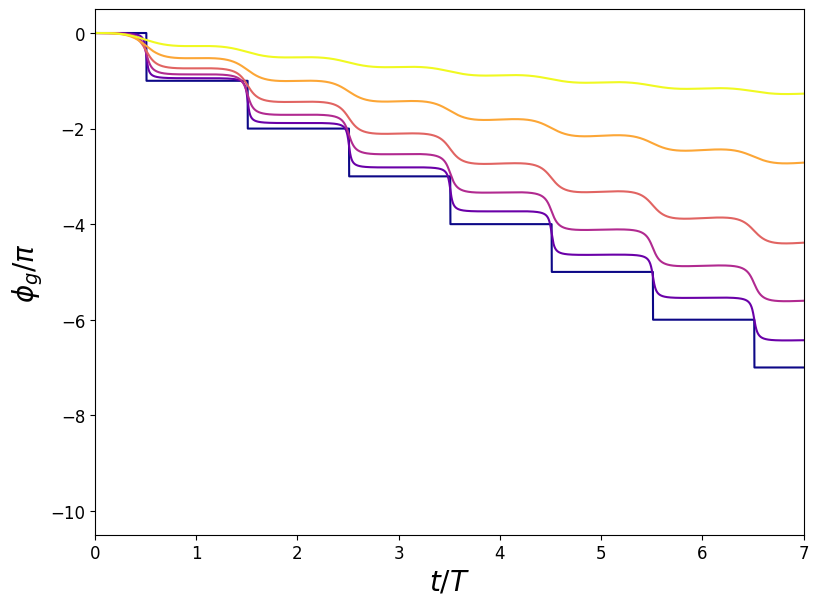

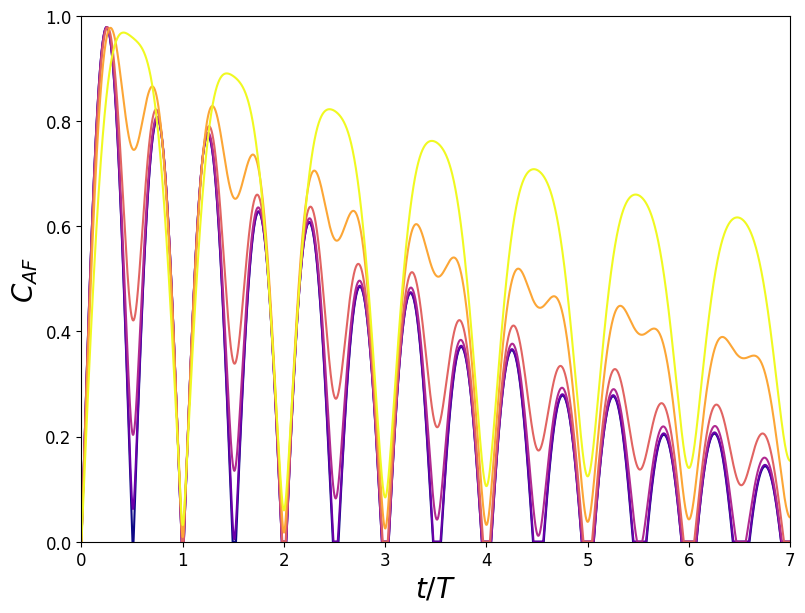

In [16]:
w_0=1
g=0.001*w_0
p=0.005*g
x=0
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
delta=[0.0000000001*g,0.1*g,0.25*g,0.5*g,g,2*g]

colors=colormaps['plasma'](np.linspace(0,1,len(delta)))
for i,delta in enumerate(delta):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=10*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,7)
ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


FG DEPENDENCIA CON EL DETUNNING 2

DEPENDENCIA CON EL KERR

<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\3692532237.py:44: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

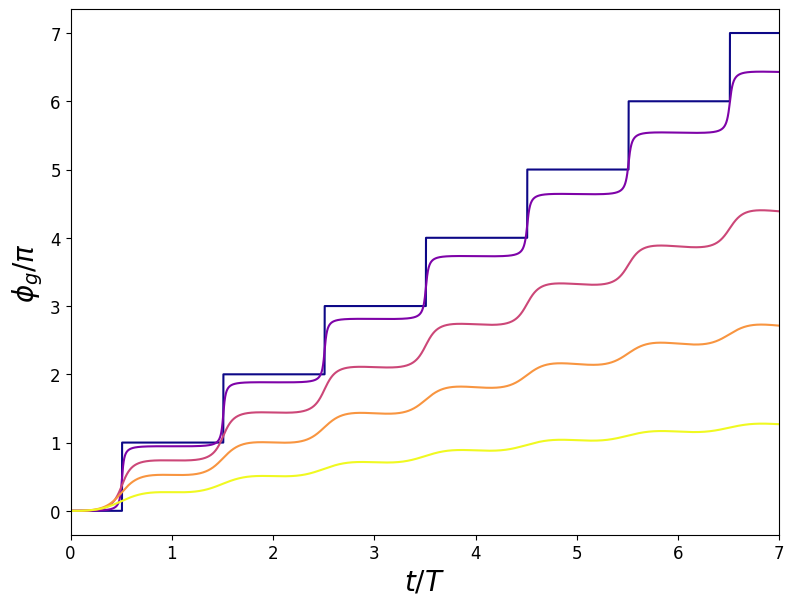

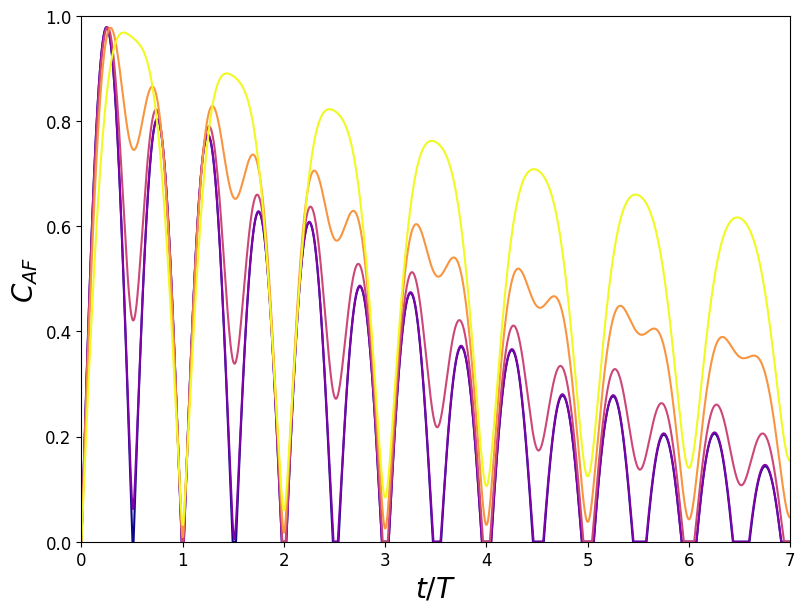

In [20]:
w_0=1
g=0.001*w_0
p=0.005*g
delta=-0.000000001*g
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
colors=colormaps['plasma'](np.linspace(0,1,5))
for i,x in enumerate([0,0.1*g,0.5*g,g,2*g]):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=7*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,7)
ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

DIFERENCIA ENTRE FASE UNITARIA Y DISIPATIVA PARA UN DADO TIEMPO EN FUNCION DEL DETUNNING PARA 3 DIFERENTES GAMMA

In [46]:
delta=1*g
x=0
T=2*np.pi/omega_n(1,delta,x)
t_final=3*T
print(t_final)
delta_list=np.linspace(0.0000000001*g,15*g,151)
print(delta_list/g)


8429.777677248872
[1.00e-10 1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01
 8.00e-01 9.00e-01 1.00e+00 1.10e+00 1.20e+00 1.30e+00 1.40e+00 1.50e+00
 1.60e+00 1.70e+00 1.80e+00 1.90e+00 2.00e+00 2.10e+00 2.20e+00 2.30e+00
 2.40e+00 2.50e+00 2.60e+00 2.70e+00 2.80e+00 2.90e+00 3.00e+00 3.10e+00
 3.20e+00 3.30e+00 3.40e+00 3.50e+00 3.60e+00 3.70e+00 3.80e+00 3.90e+00
 4.00e+00 4.10e+00 4.20e+00 4.30e+00 4.40e+00 4.50e+00 4.60e+00 4.70e+00
 4.80e+00 4.90e+00 5.00e+00 5.10e+00 5.20e+00 5.30e+00 5.40e+00 5.50e+00
 5.60e+00 5.70e+00 5.80e+00 5.90e+00 6.00e+00 6.10e+00 6.20e+00 6.30e+00
 6.40e+00 6.50e+00 6.60e+00 6.70e+00 6.80e+00 6.90e+00 7.00e+00 7.10e+00
 7.20e+00 7.30e+00 7.40e+00 7.50e+00 7.60e+00 7.70e+00 7.80e+00 7.90e+00
 8.00e+00 8.10e+00 8.20e+00 8.30e+00 8.40e+00 8.50e+00 8.60e+00 8.70e+00
 8.80e+00 8.90e+00 9.00e+00 9.10e+00 9.20e+00 9.30e+00 9.40e+00 9.50e+00
 9.60e+00 9.70e+00 9.80e+00 9.90e+00 1.00e+01 1.01e+01 1.02e+01 1.03e+01
 1.04e+01 1.05e+01 1.06e+01 1.07e

<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_9980\392063321.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)


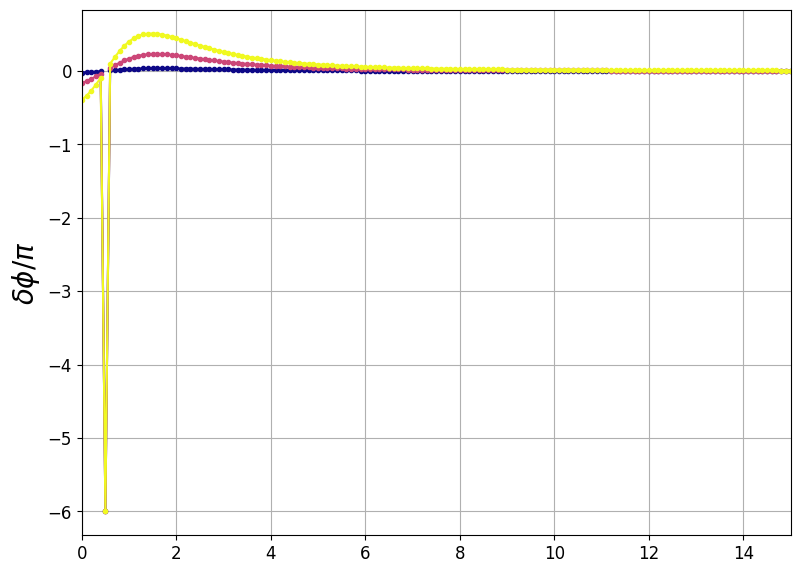

In [51]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
x=0.5*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(0.000001*g,15*g,151)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=colormaps['plasma'](np.linspace(0,1,3))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)
ax_fg.set_xlim(0,15)



[1.00000000e-06 1.00000993e-01 2.00000987e-01 3.00000980e-01
 4.00000973e-01 5.00000967e-01 6.00000960e-01 7.00000953e-01
 8.00000947e-01 9.00000940e-01 1.00000093e+00 1.10000093e+00
 1.20000092e+00 1.30000091e+00 1.40000091e+00 1.50000090e+00
 1.60000089e+00 1.70000089e+00 1.80000088e+00 1.90000087e+00
 2.00000087e+00 2.10000086e+00 2.20000085e+00 2.30000085e+00
 2.40000084e+00 2.50000083e+00 2.60000083e+00 2.70000082e+00
 2.80000081e+00 2.90000081e+00 3.00000080e+00 3.10000079e+00
 3.20000079e+00 3.30000078e+00 3.40000077e+00 3.50000077e+00
 3.60000076e+00 3.70000075e+00 3.80000075e+00 3.90000074e+00
 4.00000073e+00 4.10000073e+00 4.20000072e+00 4.30000071e+00
 4.40000071e+00 4.50000070e+00 4.60000069e+00 4.70000069e+00
 4.80000068e+00 4.90000067e+00 5.00000067e+00 5.10000066e+00
 5.20000065e+00 5.30000065e+00 5.40000064e+00 5.50000063e+00
 5.60000063e+00 5.70000062e+00 5.80000061e+00 5.90000061e+00
 6.00000060e+00 6.10000059e+00 6.20000059e+00 6.30000058e+00
 6.40000057e+00 6.500000

(-0.075, 0.12)

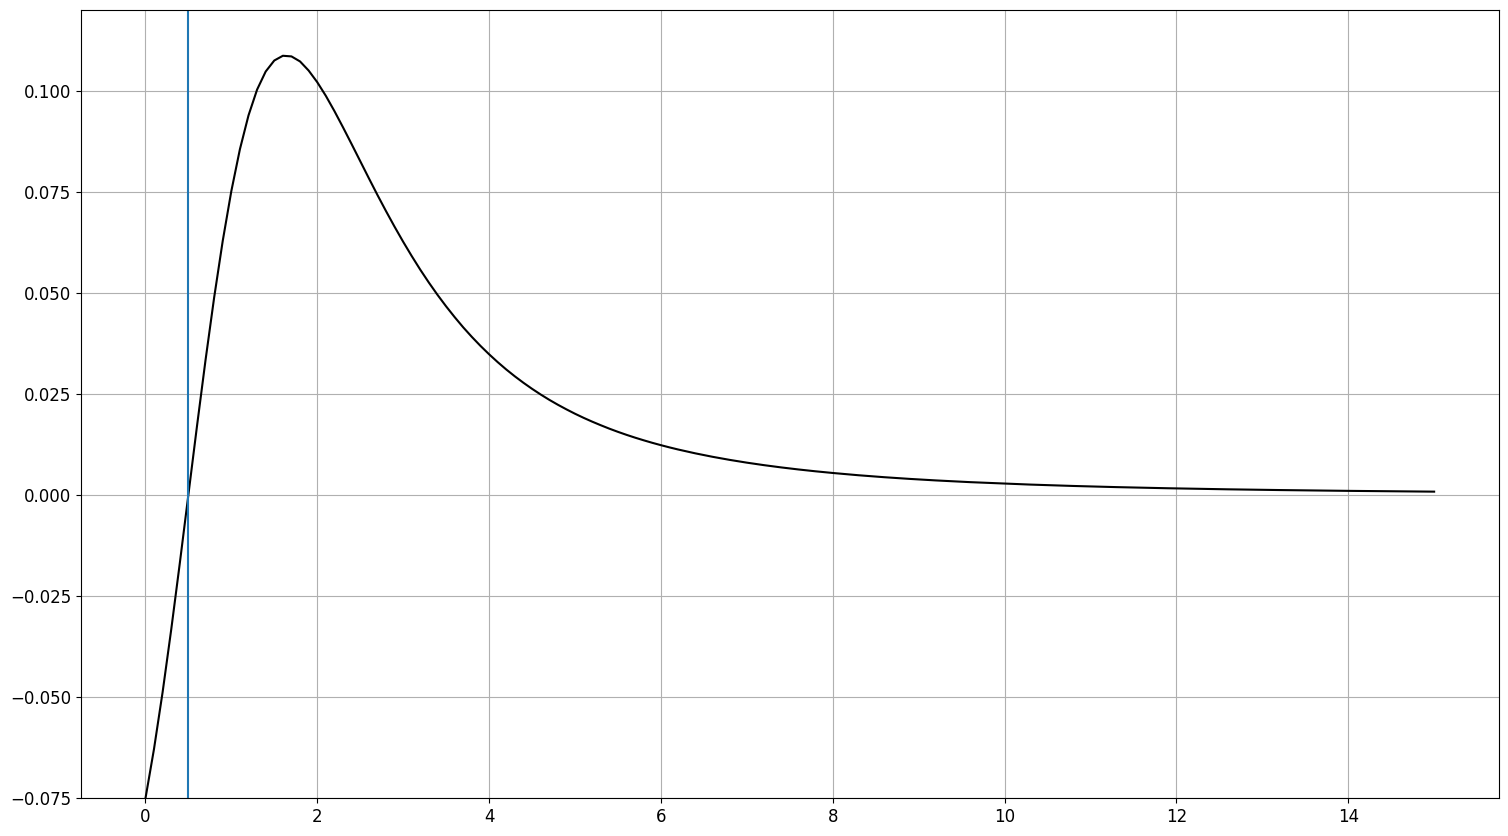

In [13]:

delta_list=np.linspace(0.000001*g,15*g,151)
print(delta_list/g)

delta_list=np.delete(np.linspace(0.000001*g,15*g,151),5)
fg1=np.delete(np.loadtxt('robustezfg0x=0.5g.txt'),5)
fg2=np.loadtxt('robustezfg0x=0.5g.txt')
fg3=np.loadtxt('robustezfg0x=0.5g.txt')
plt.plot(delta_list/g,fg1,color='black')
plt.grid()
plt.vlines(0.5,-1,1)
plt.ylim(-0.075,0.12)

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
x=g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(0.0000000001*g,15*g,151)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=colormaps['plasma'](np.linspace(0,1,3))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlim(0,15)
ax_fg.grid()


DEPENDENCIA DE LA FASE GEOMETRICA CON EL MEDIO KERR

<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\2161644910.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_11580\2161644910.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:1159: SyntaxWarning: invalid escape sequence '\l'
  ax_eval.plot(g*data['t'],data['Eigenvalue '+str(j)],color=colors_eval[i][j],label=f"$\lambda_{j}$")
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:1371: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.plot(g*data['t'],data['FG'],color=colors1[i],label=f'$|\psi_0>=|{ci}>')
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:1443: SyntaxWarning: invalid escape sequence '\D'
  ax=ax_n0,orientation='vertical',label='$\Delta$')
d:\Estu

KeyboardInterrupt: 

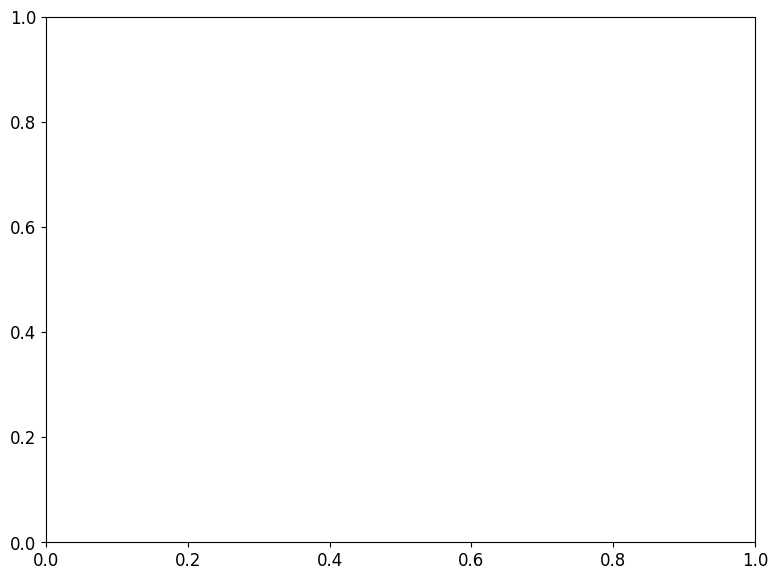

In [14]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
delta=0.00001*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
chi_list=np.linspace(0.0000001*g,15*g,151)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=colormaps['plasma'](np.linspace(0,1,3))
    chifg=np.zeros(len(chi_list))
    for i,x in enumerate(chi_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        chifg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(chi_list/g,chifg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlim(0,15)
ax_fg.grid()
